# Predicting Knowledge Level of Students in Electrical DC Machines

# Introduction

Electrical DC Machines are essential components of many electrical systems, and students learning about this subject must have a good understanding of it. In this project, we aim to analyze the student's knowledge status about the subject of Electrical DC Machines. The dataset used in this project is obtained from a Ph.D. thesis. and the dataset was obtained from the UCI Machine Learning Repository titled "User knowledge Modelling Data Set".

We want to answer the following question:

**Can we predict the knowledge level of students in Electrical DC Machines based on their study habits (STG,SCG,STR)?**

This dataset contains information on students knowledge status about Electrical DC Machines, including their study time for goal object materials (STG), degree of repetition number of user for goal object materials (SCG), degree of study time of user for related objects with goal object (STR), exam performance of user for related objects with goal object (LPR), exam performance of user for goal objects (PEG), and knowledge level of the user (UNS). The UNS column is the target variable, with four possible values: Very Low, Low, Middle, and High.

The columns in the dataset are:
<ol>
    <li> STG: The degree of study time for goal object materials </li>
    <li> SCG: The degree of repetition number of user for goal materials</li>
    <li> STR: The degree of study time of user for related objects with goal object</li>
    <li> LPR: The exam performance of user fro related objects with goal object </li>
    <li> PEG: The exam performance of user for goal objects</li>
    <li> UNS: The knowledge level of user</li>
</ol>

# Preliminary exploratory data analysis

In [43]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(readxl)
set.seed(1234)

<h2> Loading the dataset into R </h2>

In [44]:
temp_file <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", temp_file)
study_data <- read_excel(temp_file, sheet = 2)
head(study_data)

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


<h2> Cleaning and Wrangling </h2>

In [45]:
#Data is already in tidy format
study_data_required <- study_data |> select(STG,SCG,STR,LPR,PEG,UNS) |> drop_na()
head(study_data_required)


#Summarizing
nrow(study_data_required)
data_split <- initial_split(study_data_required,prop = 0.75, strata = UNS)
data_training <- training(data_split)
data_test <- testing(data_split)

head(data_training)
head(data_test)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


[1] 258

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.50,0.20,0.85,High
0.18,0.180,0.55,0.30,0.81,High
0.12,0.120,0.75,0.35,0.80,High
0.05,0.070,0.70,0.01,0.05,very_low
0.09,0.300,0.68,0.18,0.85,High
0.08,0.325,0.62,0.94,0.56,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.20,0.14,0.35,0.72,0.25,Low
0.10,0.10,0.70,0.15,0.90,High
0.20,0.20,0.70,0.30,0.60,Middle
0.18,0.31,0.32,0.42,0.28,Low


<h2> Summary of the Dataset (not using Training dataset)</h2>

In [46]:
num_obs <- nrow(data_required)

data_summary <- data_required |>
  group_by(UNS) |>
  summarize(
    count = n(),
    percentage = (n()/num_obs) * 100
  )

data_summary

UNS,count,percentage
<chr>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
very_low,24,9.302326


<h2>Summary of the data using Training Data </h2>

In [47]:
num_observation <- nrow(data_training)

data_summary_train <- data_training |>
  group_by(UNS) |>
  summarize(
    count = n(),
       percentage = (n()/num_observation) * 100,
       STG_mean = mean(STG, na.rm = TRUE),
       SCG_mean = mean(SCG, na.rm = TRUE),
       STR_mean = mean(SCG, na.rm = TRUE),
       LPR_mean = mean(LPR, na.rm = TRUE),
       PEG_mean = mean(PEG, na.rm = TRUE))

data_summary_train

UNS,count,percentage,STG_mean,SCG_mean,STR_mean,LPR_mean,PEG_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,48,25.000000,0.4100000,0.4216875,0.4216875,0.4914583,0.7725000
Low,62,32.291667,0.3170806,0.3367097,0.3367097,0.4932258,0.2360161
Middle,68,35.416667,0.3883529,0.3709265,0.3709265,0.3310294,0.5470588
very_low,14,7.291667,0.3337857,0.2164286,0.2164286,0.3350000,0.1064286


UNS,study_habit,mean
<chr>,<chr>,<dbl>
High,STG_mean,0.4100000
High,SCG_mean,0.4216875
High,STR_mean,0.4216875
Low,STG_mean,0.3170806
Low,SCG_mean,0.3367097
Low,STR_mean,0.3367097
Middle,STG_mean,0.3883529
Middle,SCG_mean,0.3709265
Middle,STR_mean,0.3709265


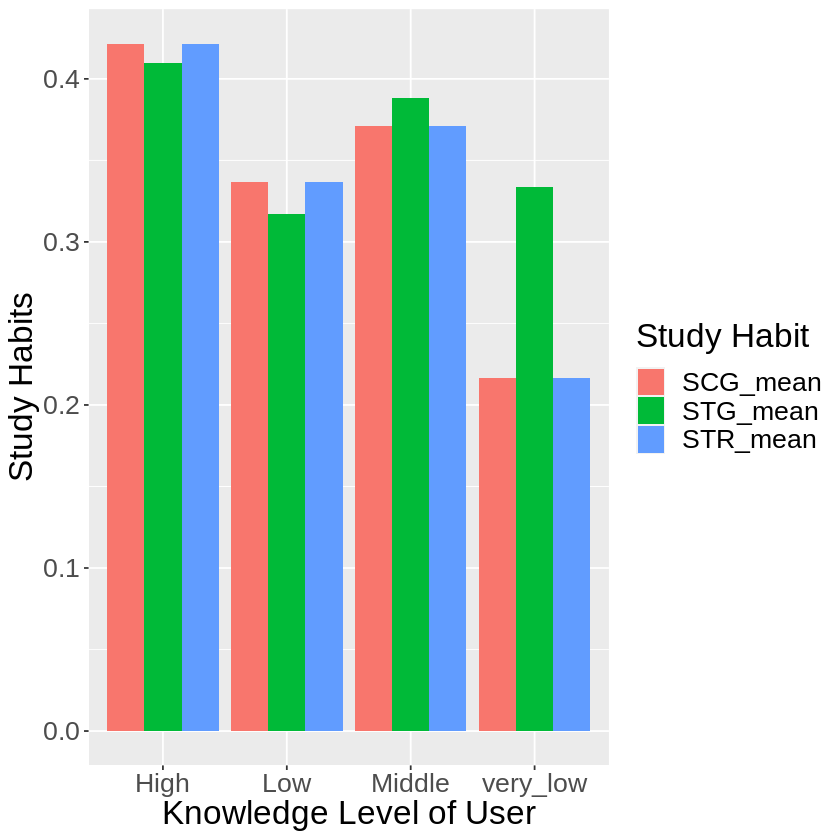

In [48]:
data_mean <- data_summary_train |>
    select(-count, -percentage, -LPR_mean, -PEG_mean) |>
    pivot_longer(cols = c(STG_mean, SCG_mean, STR_mean),
                 names_to = "study_habit",
                 values_to = "mean")
data_mean

study_habits_mean_vs_knowledge_plot <- ggplot(data_mean, aes(x = UNS, y = mean, fill = study_habit)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Knowledge Level of User", y = "Study Habits", fill = "Study Habit") + theme(text = element_text(size = 20))

study_habits_mean_vs_knowledge_plot

# Methods

We will conduct our data analysis by investigating the following columns: STG, SCG, and STR, these are all about study habits and their meanings were discussed above. We will be trying to predict the UNS.

We will use the classification by the k-nearest neighbhor method, evaluating and the tuning the classifier.

# Expected outcomes and significance

### What do you expect to find?

From the above plot and summary analysis we can loosely infer that knowledge level of the user is highly dependent on time alloted for study, repetitions of the material and study time for the particular topic. We expect that user with study habits on the higher scale might fall on high knowledge level, while students with more time alloted towards total study than respective SCG and STR might have low levels of knowledge.

### What impact could such findings have?

The investigation of the degree of study time allotted, study time allotted for a specific topic, and study time for users with the goal of predicting user knowledge level can have several consequences. Here are some examples of potential consequences:

Improved Learning Outcomes: When students spend an appropriate amount of time studying, they are more likely to have a better understanding of the material and perform better on exams. Additionally, allocating more time to specific topics can help students develop a deeper understanding of those subjects.

Customized Learning: By analyzing user study patterns and predicting knowledge levels, educators can customize learning experiences to better suit the needs of individual students. This can help optimize learning outcomes for each student.

Time Management: Understanding how much time students typically need to study and predicting their knowledge levels can help educators guide students in managing their time more effectively. This can help students prioritize their study time and achieve better results.

Resource Allocation: Institutions can use data about study time patterns to allocate resources more effectively. For example, if a significant number of students are struggling with a particular subject, the institution may decide to allocate more resources to that area.

Curriculum Improvement: Data about study time patterns and knowledge levels can be used to identify areas of the curriculum that need improvement. This can help educators refine the curriculum and create more effective learning experiences for students.

Overall, studying the degree of study time allotted, study time allotted for a particular topic, and study time for users with a goal to predict user knowledge level can have several positive impacts on learning outcomes, time management, resource allocation, and curriculum improvement.

<h3>What future questions could this lead to? </h3>

Studying the degree of study time allotted, study time allotted for a particular topic, and study time for users with a goal to predict user knowledge level could lead to several interesting and important questions for future research. Here are some examples:

How does the use of technology (e.g., online learning platforms, educational apps) affect study time patterns and knowledge levels?

What factors influence the amount of time students spend studying? For example, does socioeconomic status, prior knowledge, or motivation level impact study time?

How can educators effectively use data about study time patterns and knowledge levels to personalize learning experiences for students?

What is the optimal amount of time that should be allotted for each subject to maximize learning outcomes?

How can institutions use data about study time patterns and knowledge levels to improve teaching practices and curriculum design?

What are the long-term effects of study time patterns on students' academic and career success?